## **I. Problem Statement**

Let $P(t)$ be the percentage of Americans under the age of 18 at time $t$, measured in years. The census data for $P(t)$ is provided at ten-year intervals from 1950 to 2010:

| Year ($t$) | $P(t)$ (%) |
|:-----------|:-----------|
| 1950       | 31.1       |
| 1960       | 35.7       |
| 1970       | 34.0       |
| 1980       | 28.0       |
| 1990       | 25.7       |
| 2000       | 25.7       |
| 2010       | 24.0       |

We will:

1. Interpret the meaning and units of $P(t)$.
2. Estimate $P'(t)$ at the given years using finite differences.
3. Create a table of the estimated values.
4. Plot $P(t)$ and $P'(t)$ versus time $t$.
5. Discuss how to obtain more accurate estimates of $P'(t)$.

## **II. Load Data and Setup**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Census Data
years = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010])
P = np.array([31.1, 35.7, 34.0, 28.0, 25.7, 25.7, 24.0])

df = pd.DataFrame({'Year': years, 'P(t)': P})
df

,Year,P(t)
0,1950,31.1
1,1960,35.7
2,1970,34.0
3,1980,28.0
4,1990,25.7
5,2000,25.7
6,2010,24.0


## **III. Estimate the Derivative $P'(t)$**

We estimate $P'(t)$ in percent-per-year using finite differences:
- **Forward difference** at the first point
- **Backward difference** at the last point
- **Central difference** at interior points

In [14]:
# Initialize Array for Derivatives Estimates
dP_dt = np.zeros_like(P)

# Forward Difference for First Point
dP_dt[0] = (P[1] - P[0]) / (years[1] - years[0])

# Backward Difference for Last Point
dP_dt[-1] = (P[-1] - P[-2]) / (years[-1] - years[-2])

# Central Differences for Interior Points
dP_dt[1] = (P[2] - P[0]) / (years[2] - years[0])
dP_dt[2] = (P[3] - P[1]) / (years[3] - years[1])
dP_dt[3] = (P[4] - P[2]) / (years[4] - years[2])
dP_dt[4] = (P[5] - P[3]) / (years[5] - years[3])
dP_dt[5] = (P[6] - P[4]) / (years[6] - years[4])

# Add to DataFrame
df["P'(t)"] = dP_dt
df_tabulated = df.copy()
df_tabulated

,Year,P(t),P'(t)
0,1950,31.1,0.460
1,1960,35.7,0.145
2,1970,34.0,-0.385
3,1980,28.0,-0.415
4,1990,25.7,-0.115
5,2000,25.7,-0.085
6,2010,24.0,-0.170


## **IV. Plot $P(t)$ and $P'(t)$**

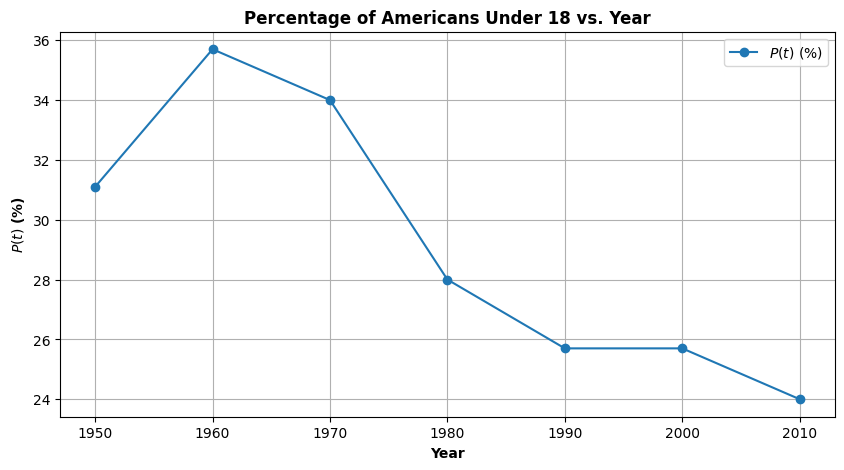

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['P(t)'], marker='o', label="$P(t)$ (%)")
plt.xlabel('Year', fontweight='bold')
plt.ylabel('$P(t)$ (%)', fontweight='bold')
plt.title('Percentage of Americans Under 18 vs. Year', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

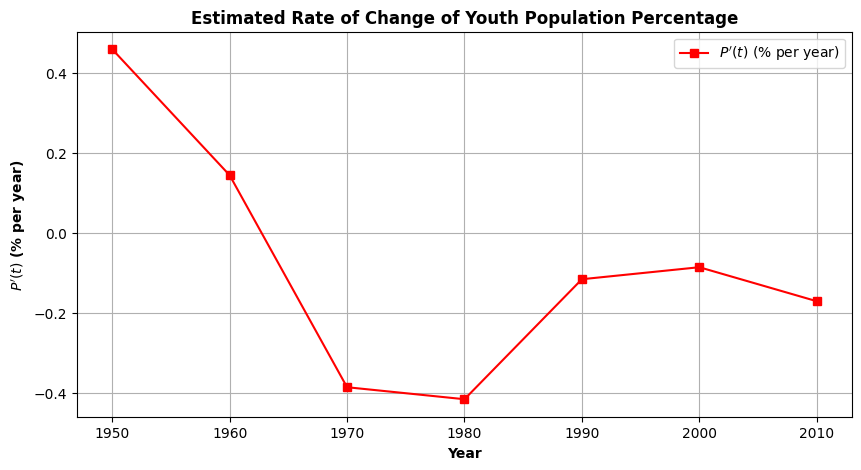

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df["P'(t)"], marker='s', color='red', label="$P'(t)$ (% per year)")
plt.xlabel('Year', fontweight='bold')
plt.ylabel("$P'(t)$ (% per year)", fontweight='bold')
plt.title('Estimated Rate of Change of Youth Population Percentage', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

## **V. Discussion and Improving Accuracy**

- **Meaning of $P'(t)$**: The *instantaneous rate of change* of the percentage of Americans under 18, measured in percentage point per year.
- **Units**: % per year
- **Improving Accuracy**:
  - Use more frequent data points (e.g., annual or five-year estimates).
  - Apply higher-order finite difference formulas if more neighboring points are available.
  - Fit a smooth function (e.g., spline or polynomial) to the data and differentiate analytically
  - Incorporate demographic modeling to account for birth rates, aging, and migration